In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data_analyst_jobs_cleaned.csv")

In [5]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'


In [6]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

seniority
na        92
junior    10
senior     2
Name: count, dtype: int64

In [7]:
df['Len_Job Description'] = df['Job Description'].apply(lambda x: len(x))
df['Len_Job Description']

0      396
1      159
2      718
3      496
4      503
      ... 
99     527
100    900
101    413
102    927
103    594
Name: Len_Job Description, Length: 104, dtype: int64

In [8]:
df['Salary Estimate'] = df.apply(lambda x: x['Salary Estimate']*2000 if x['Salary Classification'] == 1 else(x['Salary Estimate']*12 if x['Salary Classification'] == 2 else x['Salary Estimate']), axis=1)
df['Salary Estimate'] = df['Salary Estimate']/1000
df['Salary Estimate']

0       74.000
1      120.000
2       70.000
3       85.000
4       79.286
        ...   
99      55.877
100     47.000
101     66.331
102     73.000
103     46.000
Name: Salary Estimate, Length: 104, dtype: float64

In [9]:
df.describe()

,Salary Estimate,Rating,Founded,Salary Classification,Age,Python,Spark,Excel,Tableau,AWS,SQL,Len_Job Description
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,79.713817,2.608654,911.105769,2.298077,21.509615,0.067308,0.009615,0.105769,0.057692,0.057692,0.086538,702.634615
std,24.311134,2.166206,990.547548,0.954090,42.011786,0.251767,0.098058,0.309031,0.234290,0.234290,0.282519,358.609912
min,36.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,139.000000
25%,62.500000,0.500000,-1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,460.250000
50%,74.124000,3.600000,-1.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,606.500000
75%,95.000000,4.000000,1989.500000,3.000000,26.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,851.500000
max,150.000000,5.000000,2014.000000,3.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2366.000000


In [10]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Salary Classification', 'Job State',
       'Age', 'Python', 'Spark', 'Excel', 'Tableau', 'AWS', 'SQL', 'seniority',
       'Len_Job Description'],
      dtype='object')

<Axes: >

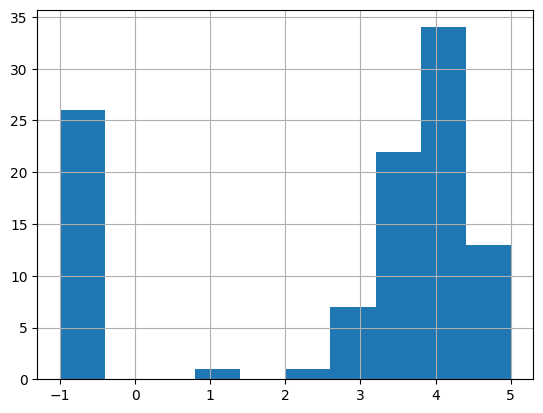

In [11]:
df['Rating'].hist()

<Axes: >

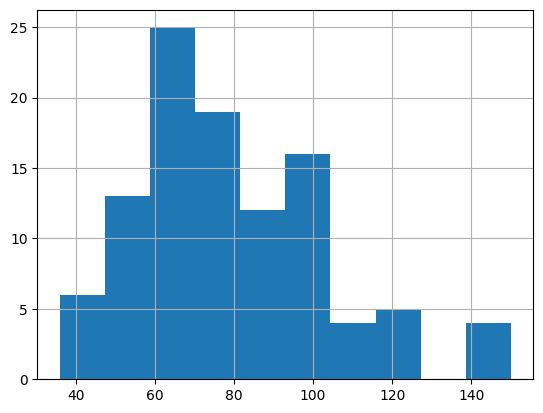

In [12]:
df['Salary Estimate'].hist()

<Axes: >

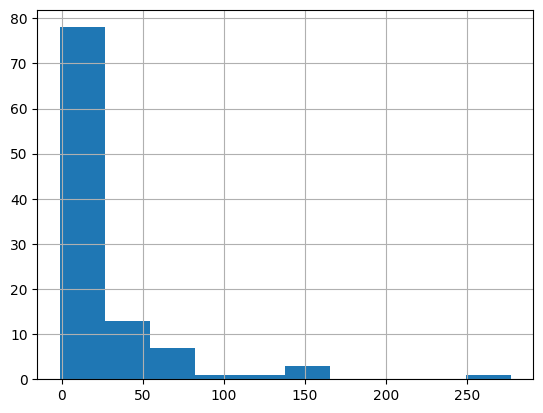

In [13]:
df['Age'].hist()

<Axes: >

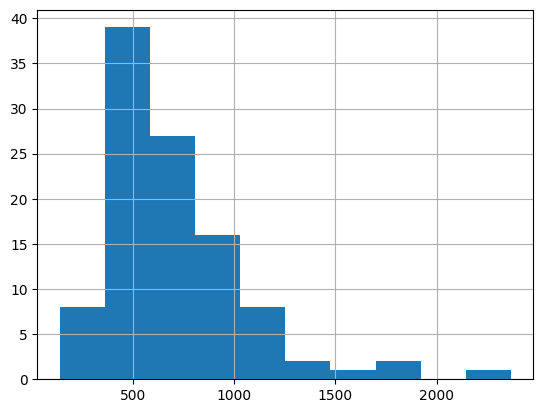

In [14]:
df['Len_Job Description'].hist()

<Axes: >

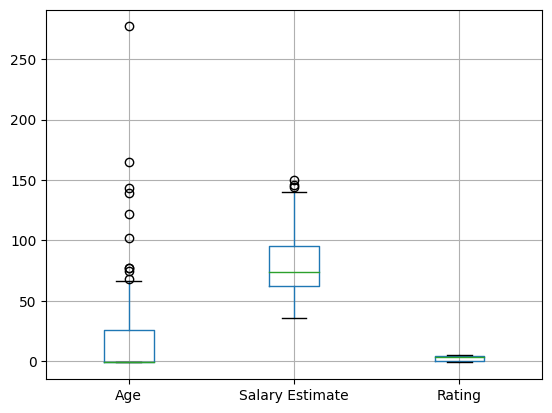

In [15]:
df.boxplot(column= ['Age', 'Salary Estimate', 'Rating'])

<Axes: >

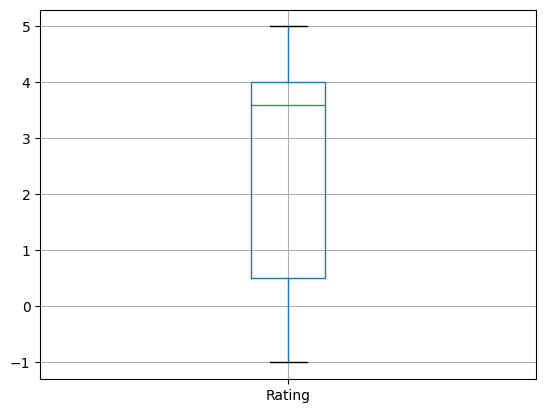

In [16]:
df.boxplot(column= ['Rating'])

In [17]:
correlation = df[['Age', 'Salary Estimate', 'Rating', 'Len_Job Description']].corr()
correlation

,Age,Salary Estimate,Rating,Len_Job Description
Age,1.000000,-0.172808,0.283992,0.175769
Salary Estimate,-0.172808,1.000000,-0.296666,-0.040142
Rating,0.283992,-0.296666,1.000000,0.216903
Len_Job Description,0.175769,-0.040142,0.216903,1.000000


<Axes: >

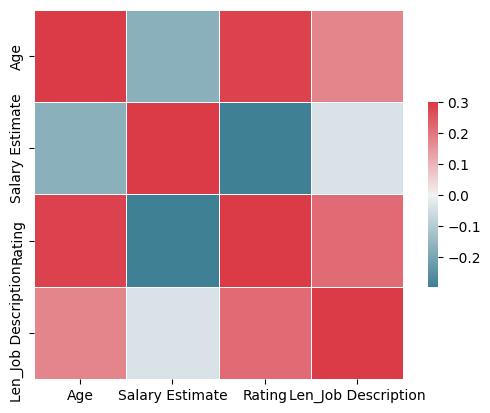

In [18]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, vmax=.3,center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={'shrink': .5  })

In [19]:
df['Company Name'].value_counts()

Company Name
DONIA LLC                   1
Shubh Labh Vivah Sanstha    1
NU World Graphics           1
United States Steel         1
Percept Health              1
                           ..
The AES Corporation         1
CASA-Trinity                1
Accolite Digital            1
Decision Science LLC        1
Vision y Compromiso         1
Name: count, Length: 104, dtype: int64

In [20]:
df_cat = df[['Location', 'Company Name', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Job State', 'Python', 'Spark', 'Excel', 'Tableau', 'AWS', 'SQL']]

graph for Location: total = 75


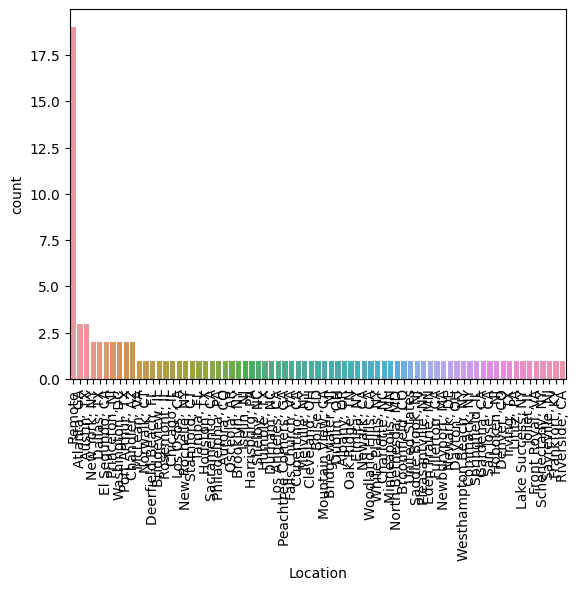

graph for Company Name: total = 104


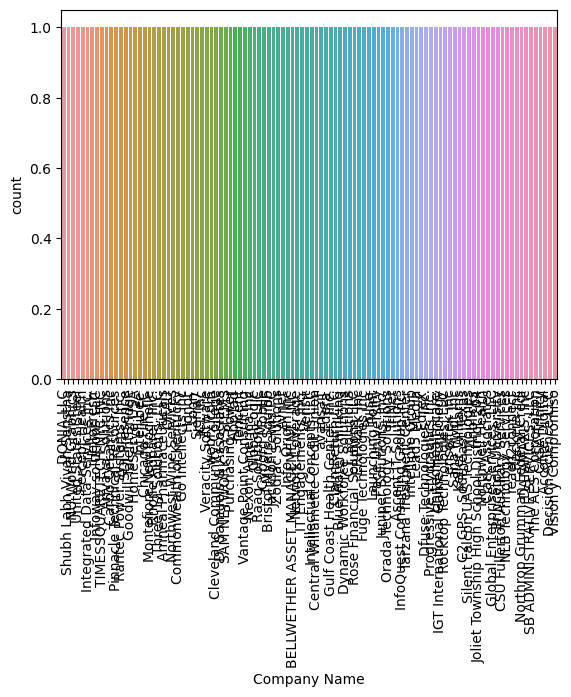

graph for Size: total = 9


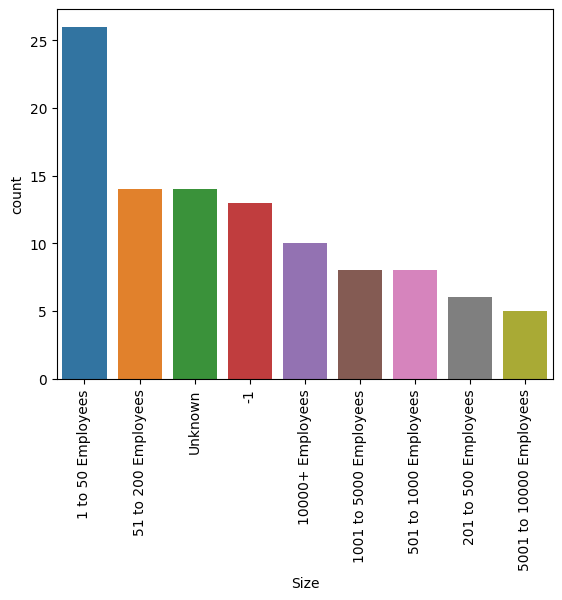

graph for Type of ownership: total = 11


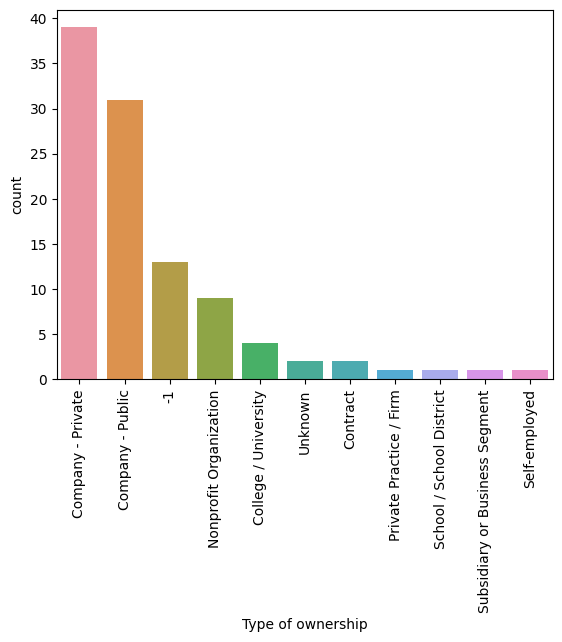

graph for Industry: total = 31


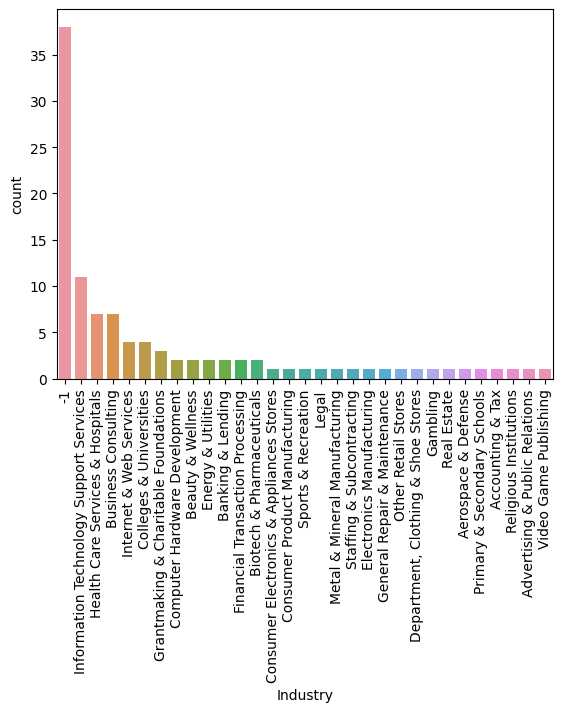

graph for Sector: total = 19


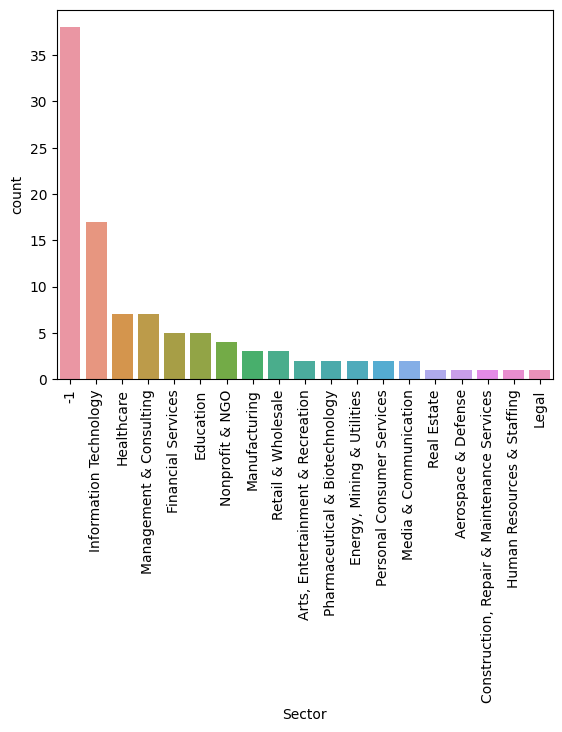

graph for Revenue: total = 11


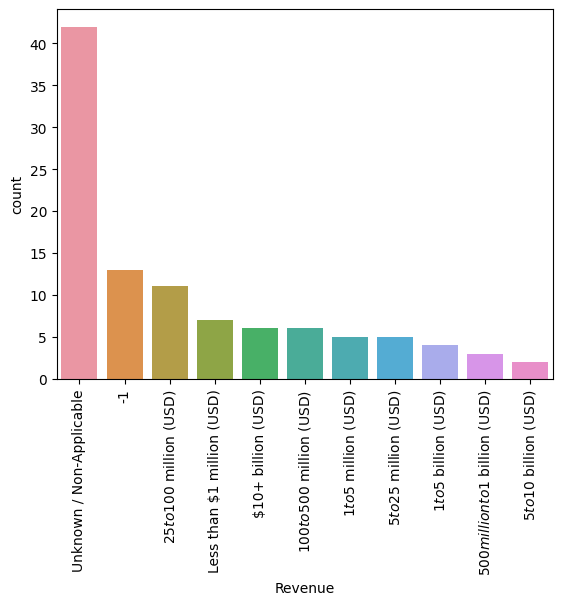

graph for Job State: total = 25


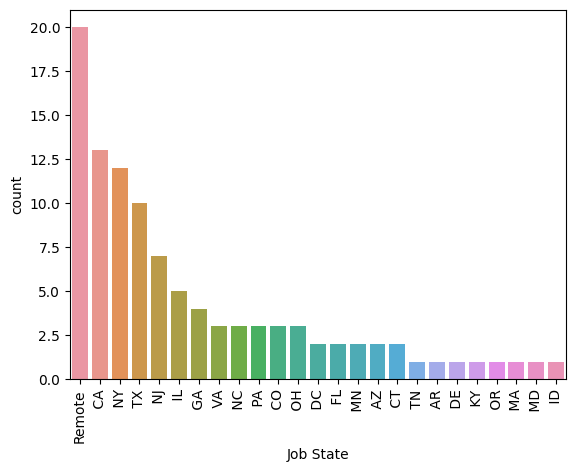

graph for Python: total = 2


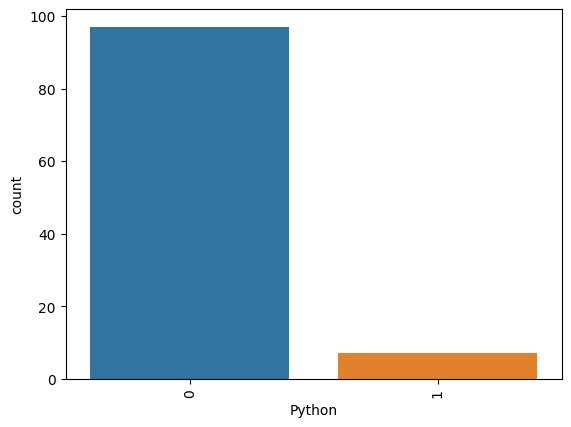

graph for Spark: total = 2


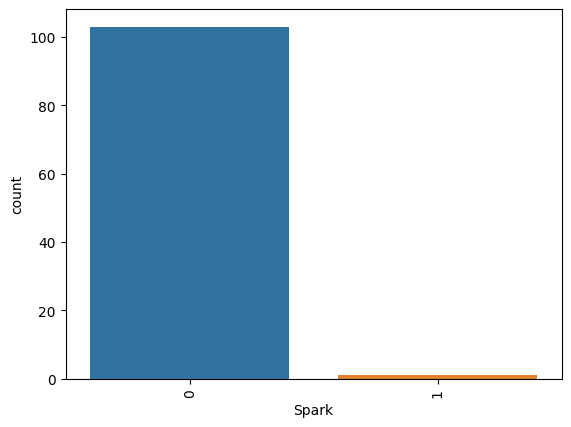

graph for Excel: total = 2


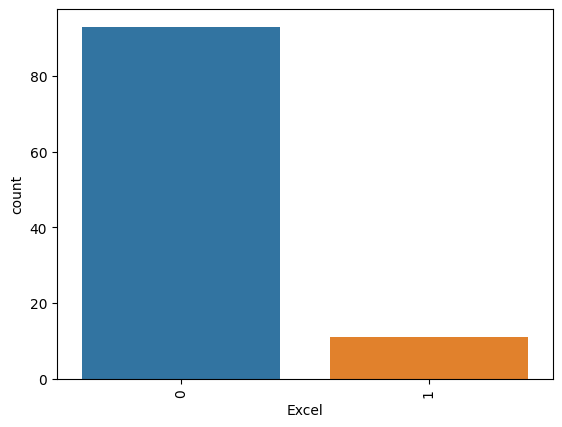

graph for Tableau: total = 2


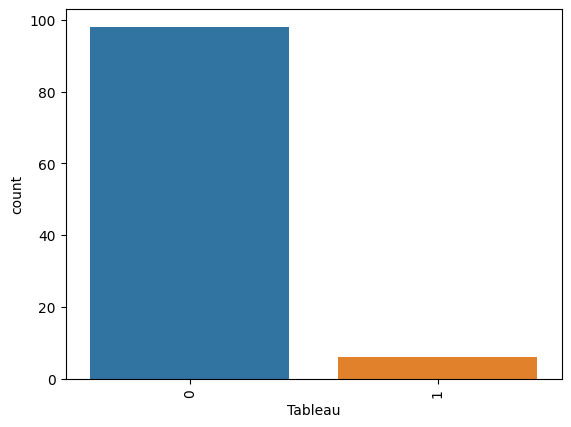

graph for AWS: total = 2


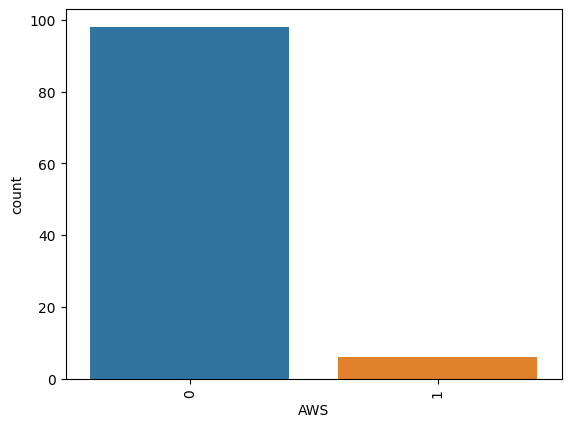

graph for SQL: total = 2


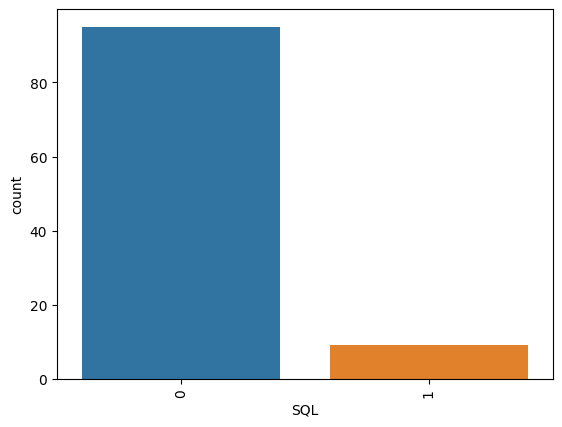

In [21]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


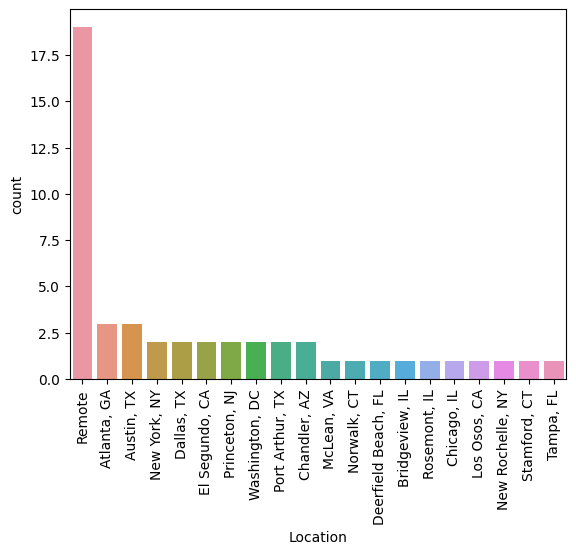

graph for Company Name: total = 20


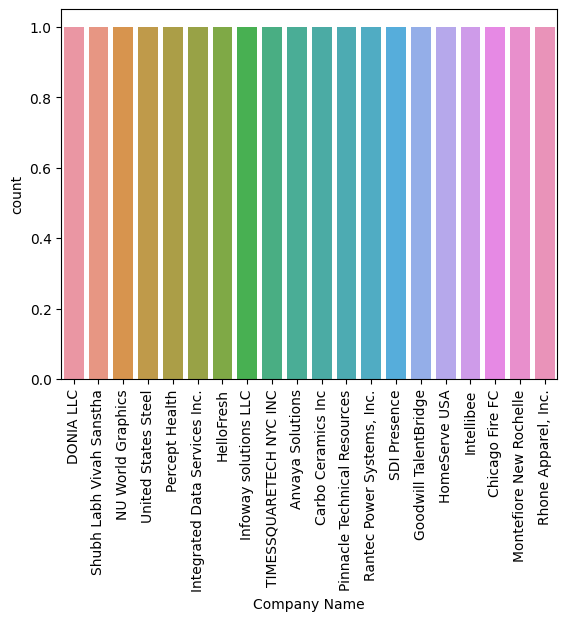

In [22]:
for i in df_cat[['Location', 'Company Name']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [23]:
pd.pivot_table(df, index='seniority', values='Salary Estimate')

,Salary Estimate
seniority,
junior,54.904600
na,81.704913
senior,112.169500


In [24]:
pd.pivot_table(df, index='Job State', values='Salary Estimate').sort_values('Salary Estimate', ascending=False)

,Salary Estimate
Job State,
DC,111.017000
ID,104.000000
CO,98.300000
MA,90.000000
Remote,88.862000
MN,87.725000
CA,85.753000
NC,83.292333
OH,82.749333


In [25]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue','Python', 'Spark', 'Excel', 'Tableau', 'AWS', 'SQL',
       'Type of ownership','Salary Classification',  'Salary Estimate']]
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Salary Classification', 'Job State',
       'Age', 'Python', 'Spark', 'Excel', 'Tableau', 'AWS', 'SQL', 'seniority',
       'Len_Job Description'],
      dtype='object')

In [26]:
for a in df_pivots.columns[:-1]:
    print(i)
    print(pd.pivot_table(df_pivots, index=a, values= 'Salary Estimate').sort_values('Salary Estimate', ascending=False))

Company Name
        Salary Estimate
Rating                 
 4.7         102.000000
 4.8          95.000000
-1.0          93.634000
 4.4          90.000000
 3.7          89.350667
 2.6          89.228000
 4.1          88.824333
 3.3          87.250000
 3.0          81.888000
 3.6          80.881333
 4.0          80.367917
 4.5          78.082750
 1.0          77.946000
 3.9          77.502750
 3.8          74.376333
 3.1          73.000000
 4.3          72.520000
 5.0          72.000000
 3.5          65.807833
 4.2          60.972000
 3.4          59.281500
 2.9          59.000000
 3.2          57.855500
 4.6          57.816500
 2.3          51.000000
 2.8          46.000000
Company Name
                                          Salary Estimate
Industry                                                 
Staffing & Subcontracting                      110.000000
Beauty & Wellness                              100.450000
Other Retail Stores                             95.000000
Computer Har

In [27]:
pd.pivot_table(df_pivots, index='Revenue', columns='Python', values='Salary Estimate', aggfunc='count')

Python,0,1
Revenue,,
$1 to $5 billion (USD),3.0,1.0
$1 to $5 million (USD),5.0,NaN
$10+ billion (USD),6.0,NaN
$100 to $500 million (USD),6.0,NaN
$25 to $100 million (USD),11.0,NaN
$5 to $10 billion (USD),2.0,NaN
$5 to $25 million (USD),5.0,NaN
$500 million to $1 billion (USD),3.0,NaN
-1,12.0,1.0


In [34]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

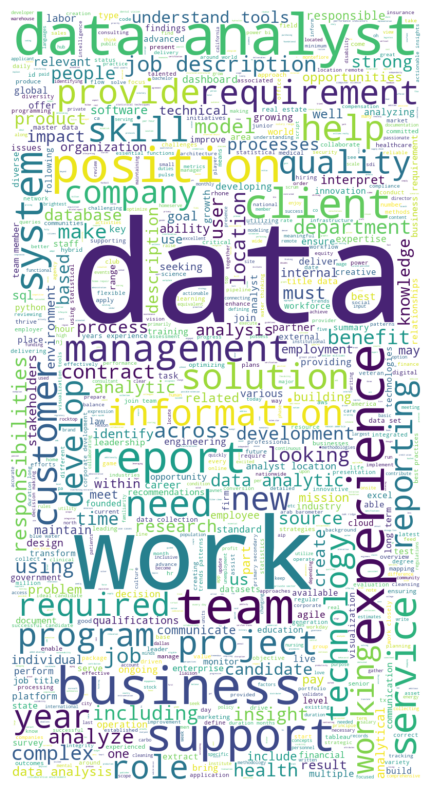

In [38]:
words = " ".join(df['Job Description'])
words
def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [39]:
df.to_csv("EDA_data.csv", index=False)